# Handling the Missing Values

### Function To find out Missing Values in Data

In [1]:
def check_na(data):
    missing_values= data.isna().sum().reset_index()
    missing_values.columns= ["Features", "Missing_Values"]
    missing_values["Missing_Percent"] = round(missing_values.Missing_Values/len(data)*100,2)
    missing_values = missing_values[missing_values.Missing_Values > 0 ]

    return missing_values.sort_values("Missing_Percent", ascending=False).reset_index(drop=True)

# Types of missing data

### 1. MCAR - (Missing completely at random)
### 2. MNAR - (Missing data not at random)(Systematic missing)
### 3. MAR - Missing at random
------------------------------------------------------------------------------------------------------
## 1. MCAR - (Missing completely at random)

If probability of being missing is same for every observation which means their is no pattern in missing value. and hence *pattern of missing values* does not have any relationship whith any other variable



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/00. Data_Store/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- **Embarked** this column has nothing to with any other variable hence it is the e.g. of MCAR

In [4]:
df[df["Age"].isnull() & df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


- For almost every NaN value of **Age**, their NaN for **Cabin** also.
- Here, **Age** & **Cabin** may having NaN values because those people from titanic were not alive to provide those data hence their is Relationship between Missing value of Age and Cabine as both of values can be assumed to be NAN because of same reason. hence **It is not a type of MCAR**

------------------------------------------------------------------------------------------------------
## 2. MNAR - (Missing data not at random)(Systematic missing)

When probability of being missing is not same for every instances for a variable and their is relationship data missing and any other variable.

E.g. **Age**,**Cabin** have some relationship between them, because of which they both have NaN at many common instances.


In [5]:
df["cabin_null"] = np.where(df["Cabin"].isnull(), 1, 0)
df["cabin_null"].mean()

0.7710437710437711

In [6]:
df.groupby(["Survived"])["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

From Survived people their is only 60% missing value but for people who not survived have 88% of missing values, Hence we can conclude that Missing value at Cabin is because those people could not survived.

------------------------------------------------------------------------------------------------------
## 3. MAR - Missing at random

e.g. Men hiding their salary, females hiding their age so salary and age variables are dependent on Sex feature but their is no relationship between which instance is missing so data is missing at random

---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------

# Techniques of Handling the Missing Values
------------------------------------------------------------------------

# 1.  For Continuos Missing Data

### 1. Mean/Median/Mode Imputation
### 2. Random Sample Imputation
### 3. Capturing NAN values with a new feature
### 4. End of Distribution imputation
### 5. Abritrary value imputation
------------------------------------------------------------------------
# 2 For Categorical Missing Data

### 1. Frequency category imputation 
### 2. Adding a variable to capture NAN

-------------------------------------------------------------------------
-------------------------------------------------------------------------

# 1.  For Continuos Missing Data
# 1.1. Mean/Median/Mode Imputation

#### When to Use?
- When Data is MCAR

#### How?
- Replace NaN by most frequent occurance of variable.
- When their are concerned about outliers we should consider using Median of Mode  instead of Mean.

In [ ]:
# Function to Impute Null values with Mean, Median, Mode

def missing_value_imputer(data, feature, method):
    if method == "mode":
        data[feature] = data[feature].fillna(data[feature].mode()[0])
    elif method == "median":
        data[feature] = data[feature].fillna(data[feature].median())
    else:
        data[feature] = data[feature].fillna(data[feature].mean())

In [7]:
path = 'C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic_train.csv'
df = pd.read_csv(path)

In [8]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Age has 20% Missing data and Cabin has 77% Missing data, We can replace this with Median and Mode

### Replacing Age with Median and Mode and See Standerd deviation which one lesser.

In [10]:
df["Age"].std()

14.526497332334042

In [11]:
df["Age_after"] = df["Age"].fillna(df["Age"].median())
df["Age_after"].std()

13.019696550973201

In [12]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_after
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0


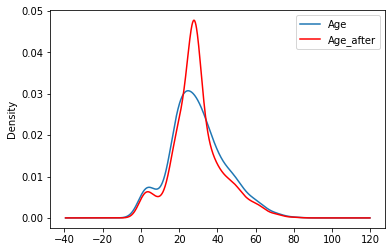

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind="kde", ax=ax)
df["Age_after"].plot(kind="kde", ax=ax, color="red")
plt.legend()

## Advantages of Mean/Median/Mode Imputation
1. Easy and Quick to implementations
2. Medians are Robust to Outliers (NOT MEAN)

## Disadvantages of Mean/Median/Mode Imputation
1. Change or Distortion in the original varience and standerd deviations. as we can see from above plot their is change in spread.
2. It Impacts Correlations

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
# 1.2. Random Sample Imputation

- It takes random observations/data instances and used them to replace NaN values.
- It is used when data is missing completely at random(MCAR)

In [14]:
path = 'C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic_train.csv'
df = pd.read_csv(path, usecols=["Age", "Fare","Survived"])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [15]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [16]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [17]:
def impute_nan(df, variable):
    
    df[variable+"_random"] = df[variable]
    
    samples_without_Nan = df[variable].dropna()
    
    count_of_nan = df[variable].isnull().sum()
    
    random_samples = samples_without_Nan.sample(count_of_nan, random_state=0)
    
    random_samples.index = df[df[variable].isnull()].index
        
    df.loc[df[variable].isnull(), variable+"_random"] = random_samples
    

impute_nan(df, "Age")

In [18]:
df.head(3)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0


In [19]:
df["Age_random"].isnull().sum()

0

### Change in Standerd Deviation

In [20]:
df["Age"].std()

14.526497332334042

In [21]:
df["Age_random"].std()

14.56365408956869

### Change in Density Spread

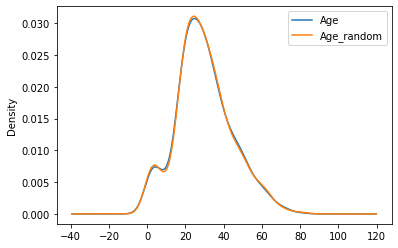

In [22]:
plt.figure()
df["Age"].plot(kind="kde", label="Age")
df["Age_random"].plot(kind="kde", label="Age_random")
plt.legend()
plt.show()

## From above We can see that standerd deviation and spread before and after the Random sample imputation does not give much difference as compare to Median imputation.

## Advantages of Mean/Median/Mode Imputation
1. Easy and quicker to implement.
2. Change in standerd deviation and spread is significantly lesser as compare to Median imputation.i.e. Less Distortion in variance.

## Disadvantages of Mean/Median/Mode Imputation
It cannot be used in every situation.

-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------

# 1.3. Capturing NAN values with a new feature

- It works well if the data are not missing completely at random (MNAR)
- It creates new feature that captures the importance of missingness or presentness of NaN value


In [23]:
df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic_train.csv',usecols=["Age", "Fare","Survived"])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [24]:
df["Age_NaN"] = np.where(df["Age"].isnull(), 1, 0)
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## That's it, We just create new feature which captures the wheather value is NaN or not and it will be accounted as new feature by model.

- In case of this perticular titanic dataset, Absence of Age value will not be influencing the survival of person i.e. this new features have no impact on output hence we cannot use such feature in this case.

- We can also create new feature that captures the missingness and replace the nulls with Mean/median imputations. So that new feature can capture the importance of missingness.

## Advantages of Mean/Median/Mode Imputation
1. Easy and quicker to implement.
2. Creates new feature which captures missing ness or present of null value as feature.

## Disadvantages of Mean/Median/Mode Imputation
1. It cannot be used in every situation.
2. causes curse of dimensionality.

-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------

# 1.4. End of Distribution imputation

- In this method we replace NaN values with values greater than or eqaul to greatest 3rd standerd deviation. Hence values are replaced with values which are far away.

- It is used when their are outliers presents which are captered by this method.
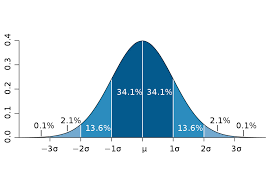

In [25]:
df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic_train.csv',usecols=["Age", "Fare","Survived"])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


<AxesSubplot:>

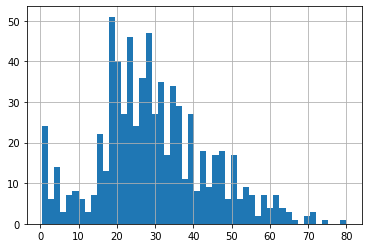

In [26]:
df["Age"].hist(bins=50)

### Here we can see the values which are far away can be considered from 70 or 75 those values are selected to replace with NaN

In [27]:
def inpute_nan(df, variable):
    extreme_val = df[variable].mean()+3*df[variable].std()
    df[variable+"_extreme"] = df[variable].fillna(extreme_val)
    df[variable+"_median"] = df[variable].fillna(df[variable].median())

inpute_nan(df,"Age")

df

,Survived,Age,Fare,Age_extreme,Age_median
0,0,22.0,7.2500,22.00000,22.0
1,1,38.0,71.2833,38.00000,38.0
2,1,26.0,7.9250,26.00000,26.0
3,1,35.0,53.1000,35.00000,35.0
4,0,35.0,8.0500,35.00000,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.00000,27.0
887,1,19.0,30.0000,19.00000,19.0
888,0,NaN,23.4500,73.27861,28.0
889,1,26.0,30.0000,26.00000,26.0


<AxesSubplot:>

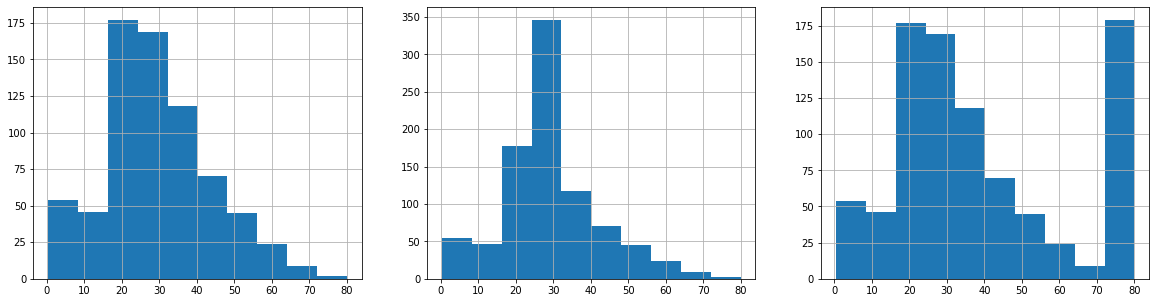

In [28]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
df["Age"].hist()

plt.subplot(1,3,2)
df["Age_median"].hist()

plt.subplot(1,3,3)
df["Age_extreme"].hist()

## To find which one better from Age_extreme and Age_median we draw BoxPlot to check outliers.

<AxesSubplot:xlabel='Age_extreme'>

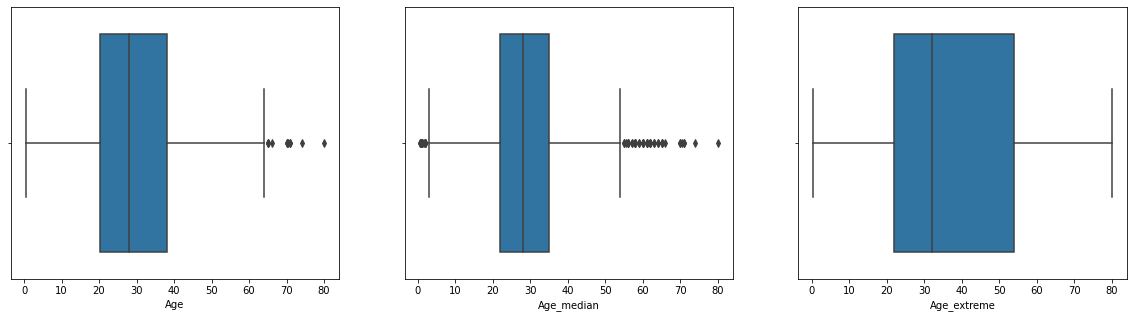

In [29]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(df["Age"], data=df)

plt.subplot(1,3,2)
sns.boxplot(df["Age_median"], data=df)

plt.subplot(1,3,3)
sns.boxplot(df["Age_extreme"], data=df)

### We can See that their are almost no outliers present in Age_extreme hence it can be used over the Age_mediam

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

# 1.5. Abritrary value imputations

 - It consist of replacing NaN with abritrary values, We can use Last outliers on both sides.
 - The Arbitrary value choosen should not be frequently present in data.
 

In [30]:
df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic_train.csv',usecols=["Age", "Fare","Survived"])
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
def inpute_nan(df, variable):
    extreme_val = df[variable].mean()+3*df[variable].std()
    df[variable+"_hundred"] = df[variable].fillna(100)
    df[variable+"_zero"] = df[variable].fillna(0)

inpute_nan(df,"Age")

df

,Survived,Age,Fare,Age_hundred,Age_zero
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,100.0,0.0
889,1,26.0,30.0000,26.0,26.0


<AxesSubplot:>

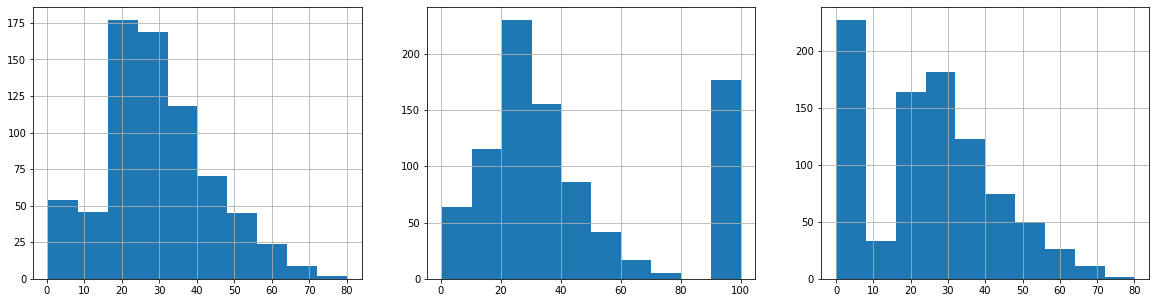

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
df["Age"].hist()

plt.subplot(1,3,2)
df["Age_hundred"].hist()

plt.subplot(1,3,3)
df["Age_zero"].hist()

### Advantages

1. Easy To implement

2. Fater way to implement

### Disadvantages

1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's

2. It distorts the relation of the most frequent label

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
# 2 Categorical Missing Data

# 2.1. Frequency category imputation - 

We just replace the Nulls with most frequent variable that is the mode of data.

In [33]:
df=pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [34]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [35]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [36]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [37]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [38]:
df["BsmtQual"].mode()

0    TA
dtype: object

#### **TA** can be taken as variable to replace at missing places in **BsmtQual** as it is most frequent in column.

#### We can use mode() or value_counts() function to get  frequently occuring feature

In [39]:
def inpute_nan(df, variable):
    fre_category = df[variable].value_counts().index[0]     # or simply use mode()
    df[variable] = df[variable].fillna(fre_category)
    

for i in df.columns:
    inpute_nan(df, i)

df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


In [40]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Advantages 
  Easy and quick.

## Disadvantages
 1.  We cannot use this method for large number of missing data otherwise it will bias the data.
 2. Distort relations between most frequent labels.

-------------------------------------------------------------------------------
## 2.2. Adding a variable feature to capture NAN

- Similar to "Capturing NAN values with a new feature"
- Add new feature that captures importance of missing value and replace missing values with Mode also.
- **Use this techniques perticularly when their are many null values present.**

- One of the most commenly used technique.

In [41]:
df=pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [42]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [43]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Advantages 
  Usefull when there are many Null values.

## Disadvantages
  Can cause problem due to many features additions.

#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [44]:
df=pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [45]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])
    
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [46]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
